# K-Nearest Neighbors (KNN)

- Distance based bir algoritmadır.

- Sınıflandırma ve regresyon problemlerinde kullanılabilir.

- Temel Prensibi: Bir veri noktasının sınıfını (veya değerini) belirlerken, veri setindeki diğer noktalara olan "yakınlığını" kullanır.

- Yeni noktanın diğer noklara olan mesafesini hesaplar. En yakın hangi sınıf ise ona dahil eder.

- KNN hesaplama yöntemleri: 1- Öklit (en çok kullanılan) 2- Manhattan

- Çok güvenilir bir algoritma olmadığından çok kullanılmaz.

- En yakın kaç komşuya göre hesaplasın? sorusunun cevabı olan "k" yı biz belirliyoruz (3-5 gibi)

- Küçükten büyüğe sort eder


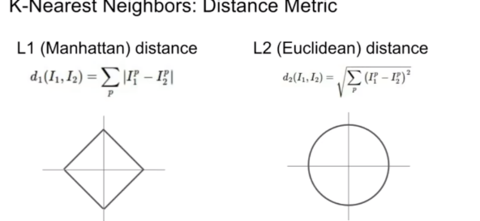

### Çalışma Prensibi

- **K Değerinin Belirlenmesi:** K, algoritmanın bir veri noktası için dikkate alacağı en yakın komşu sayısını belirtir. K'nin değeri, problemin özelliklerine ve veri setinin büyüklüğüne göre değişkenlik gösterebilir.

- **Mesafe Hesaplama:** Bir veri noktasının sınıfını tahmin ederken, KNN öncelikle bu noktanın, veri setindeki diğer tüm noktalara olan mesafesini hesaplar. Bu mesafe genellikle Öklid mesafesi olarak hesaplanır, ancak farklı mesafe ölçütleri de kullanılabilir.

- **En Yakın K Komşunun Seçilmesi:** Hesaplanan mesafelere göre en yakın K komşu belirlenir. Yani, incelenen noktaya en yakın olan K adet nokta seçilir.

- **Sınıflandırma veya Regresyon:**

  Sınıflandırma için: Seçilen K komşunun çoğunluk sınıfına göre bir sınıf tahsisi yapılır. Yani, K komşu içinde en çok hangi sınıftan varsa, incelenen nokta da o sınıfa atanır.
   
  Regresyon için: Seçilen K komşuların değerlerinin ortalaması (veya medyanı) alınarak bir tahminde bulunulur.

### Özellikleri

- **Parametrik Olmayan Yöntem:** KNN, modelin formunu önceden belirlemeyen parametrik olmayan bir yöntemdir. Bu, modelin veriye göre şekillendiği anlamına gelir.

- **Basitlik ve Anlaşılabilirlik:** KNN'nin anlaşılması ve uygulanması nispeten kolaydır.

- **Esneklik:** Hem sınıflandırma hem de regresyon problemlerinde kullanılabilir.

- **Lazy Learning (Tembel Öğrenme):** KNN, tembel bir öğrenme algoritmasıdır; yani eğitim aşamasında bir model oluşturmaz, ancak tahmin yapılırken veri setini kullanır.

### Dezavantajları

- **Ölçeklenebilirlik:** Büyük veri setlerinde, her bir tahmin için tüm veri seti üzerinden mesafe hesaplaması yapılması gerektiğinden, KNN yavaşlayabilir.

- **Yüksek Boyutlu Veriler:** "Boyut laneti" nedeniyle, yüksek boyutlu verilerde mesafe ölçümleri az farklılık gösterir ve bu da performansı olumsuz etkileyebilir.

- **Dengesiz Veri Setleri:** Eğer sınıflardan biri diğerlerine göre çok daha fazla örneğe sahipse, azınlık sınıfının etkisi göz ardı edilebilir.

Feature sayısı 2-3 ü geçtiği zaman mesafeyi ölçmek zorlaşıyor ve çok zaman alıyor

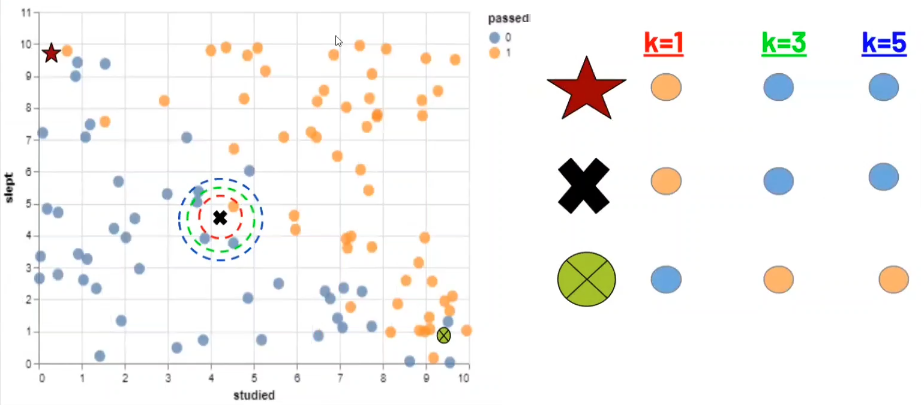

- Eğer "K" değeri çok büyükse, model veri setinin genel yapısını fazla genelleştirir ve aşırı basitleştirme (underfitting) meydana gelebilir. Bu, modelin karmaşıklığının azalması ve bireysel veri noktalarının özelliklerinin göz ardı edilmesi anlamına gelir.

- "K" değeri çok küçükse (örneğin 1), model veri üzerinde aşırı uyuma (overfitting) eğiliminde olur, yani gürültülü verilere veya aykırı değerlere fazla duyarlı hale gelir.

- Small k can lead to overfitting, as the model captures too much of the noise in the training data. Large k can lead to underfitting, as the model is too simple and fails to capture the underlying structure of the data.

- A suitable k can be chosen by looking at the performance on a validation set or by using cross-validation techniques.

**Uzaklıklar sınıf içi minimum, sınıflar arası maksimum olmalıdır.**

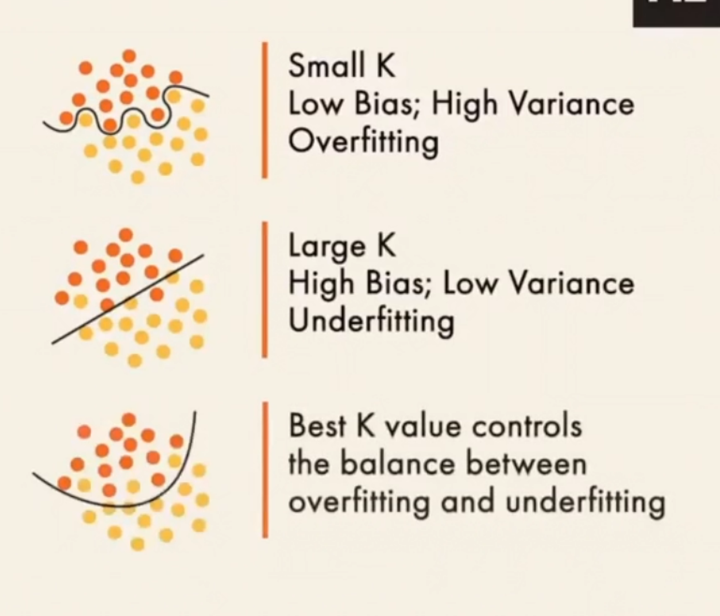

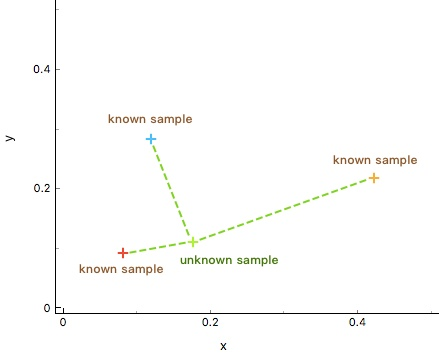

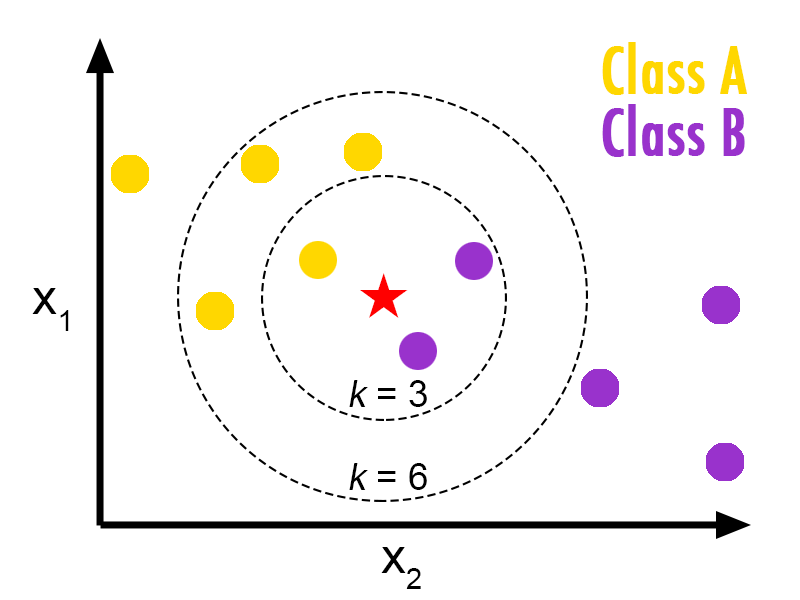

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,5)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Cancer Prediction Model

In [3]:
df = pd.read_csv("gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [6]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [8]:
df["Cancer Present"].value_counts()

# Balanced

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

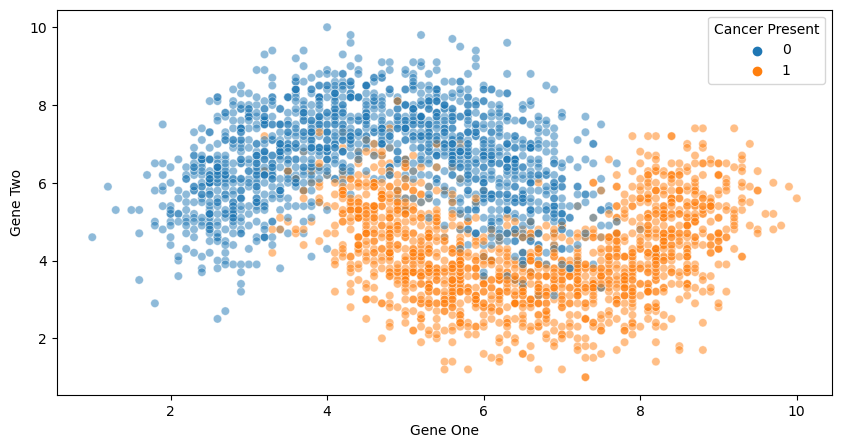

In [21]:
sns.scatterplot(x = "Gene One", y = "Gene Two", hue = "Cancer Present", data = df, alpha = 0.5);

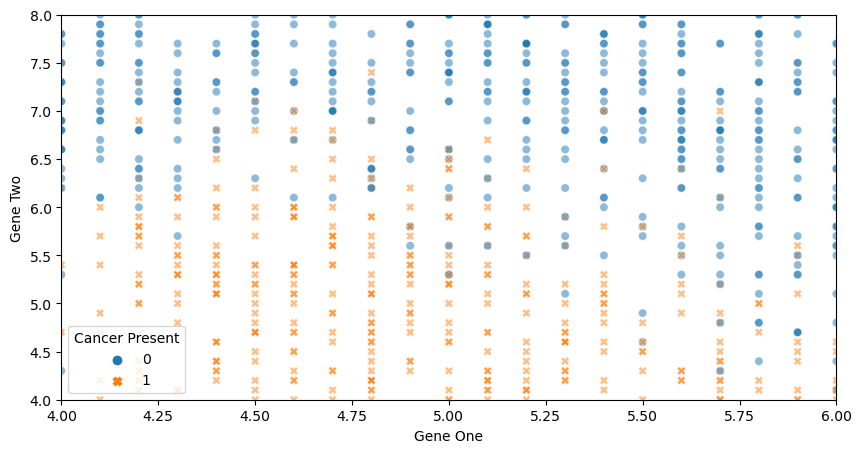

In [22]:
sns.scatterplot(x = "Gene One", y = "Gene Two", 
                hue = "Cancer Present", 
                data = df, alpha = 0.5, 
                style = "Cancer Present")
plt.xlim(4,6)
plt.ylim(4,8);

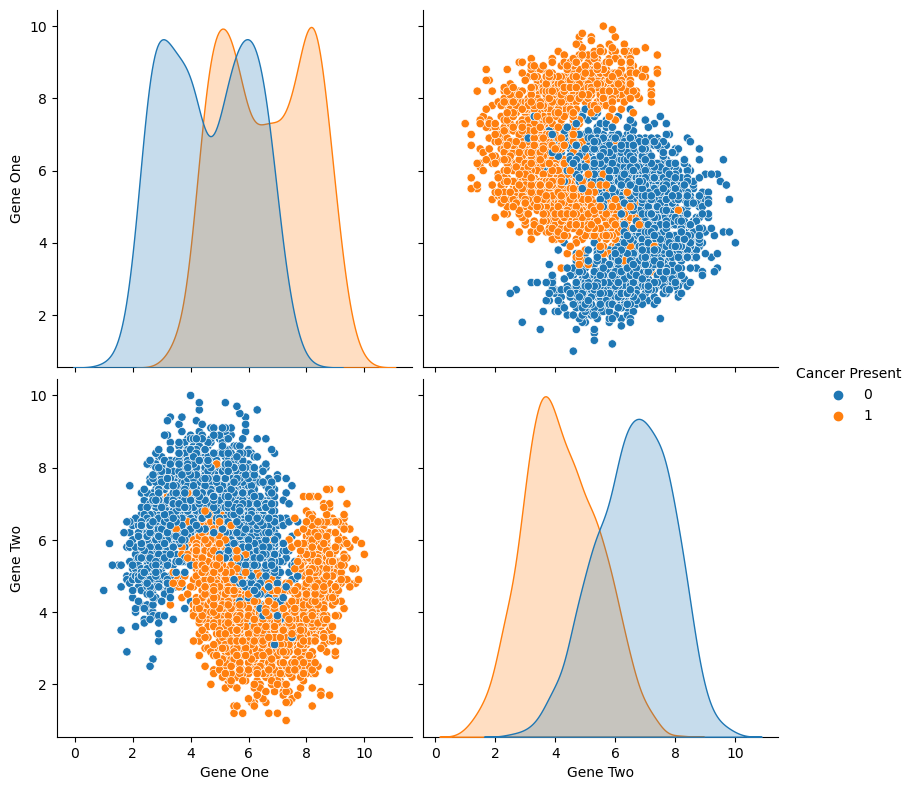

In [23]:
sns.pairplot(data = df, hue = "Cancer Present", height = 4, aspect = 1);

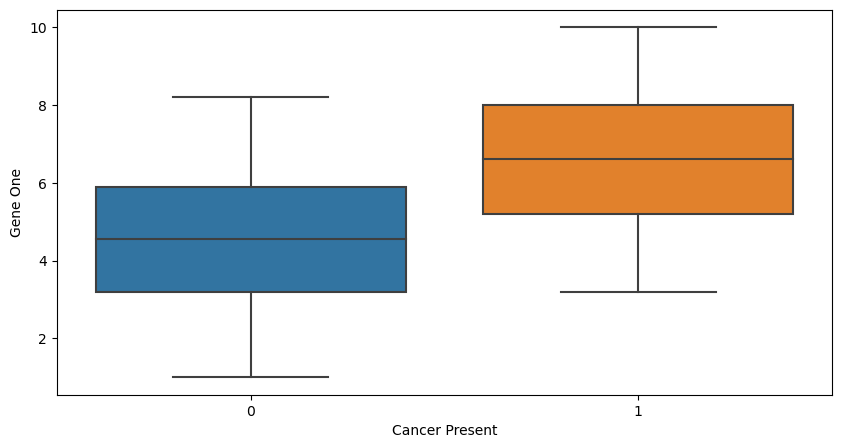

In [24]:
sns.boxplot(x = "Cancer Present", y = "Gene One", data = df );

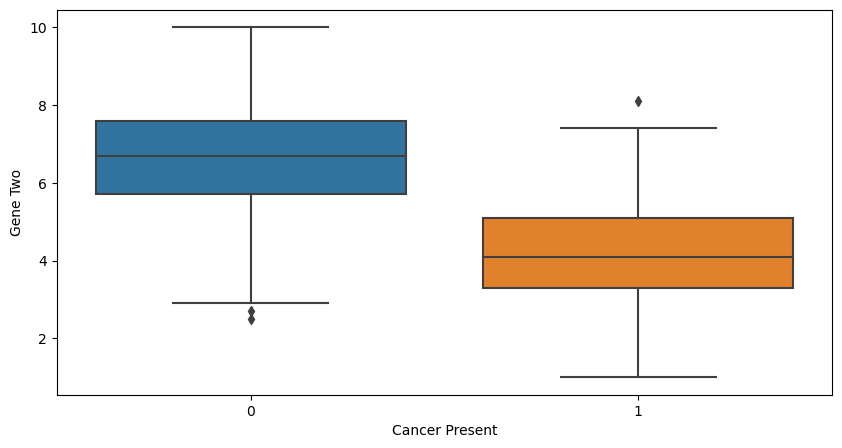

In [25]:
sns.boxplot(x = "Cancer Present", y = "Gene Two", data = df );

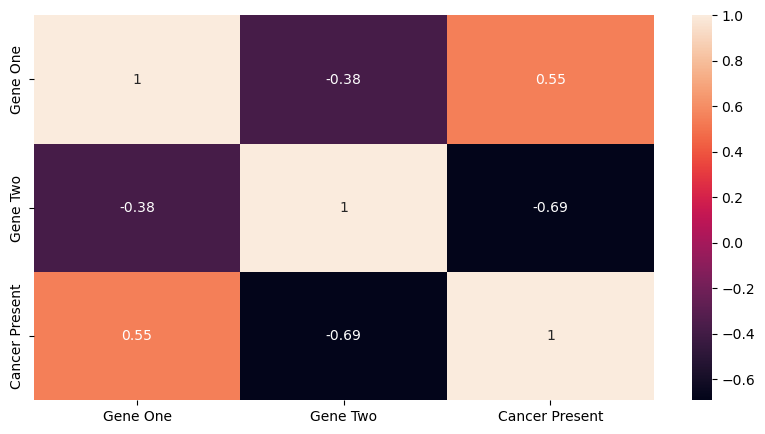

In [26]:
sns.heatmap(df.corr(), annot=True);

<IPython.core.display.Javascript object>


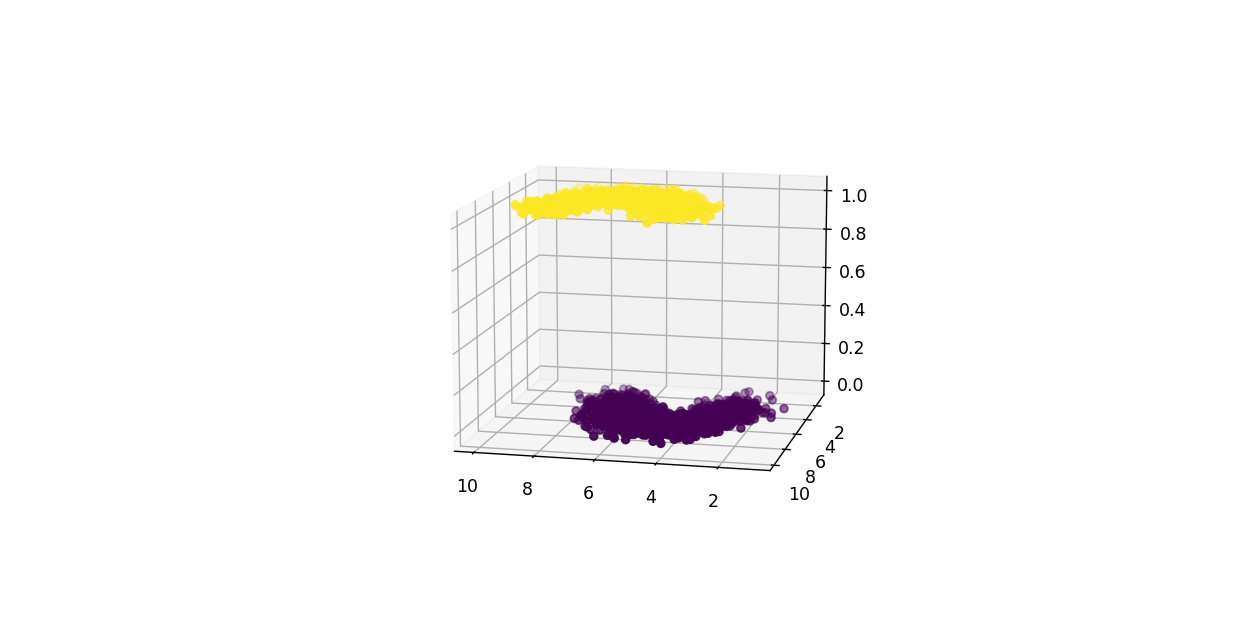

In [28]:
%matplotlib inline
#%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present']);

## Train|Test Split and Scaling